# PCA

####  Goals
* PCA
* Augment `commute_dummies` with `pca_df`

#### Output
* `commute_normed_pca_df` ready for modeling.


In [1]:
cd ..

/home/jovyan/dsi/CAPSTONE


In [2]:
%run ./lib/__init__.py
%run ./lib/preprocessing.py
%matplotlib inline

In [3]:
commute_normed = pd.read_pickle('./data/commute_normed_df.pkl')
commute_normed.shape

(1025, 59)

In [4]:
commute_dummies = pd.read_pickle('./data/commute_dummies_df.pkl')
commute_dummies.shape

(1025, 1434)

## 1. PCA

 17%|█▋        | 1/6 [00:00<00:01,  2.80it/s]

For n_clusters = 2 The average silhouette_score is : 0.265476973704


 33%|███▎      | 2/6 [00:00<00:01,  3.27it/s]

For n_clusters = 3 The average silhouette_score is : 0.273487186526


 50%|█████     | 3/6 [00:00<00:00,  3.30it/s]

For n_clusters = 4 The average silhouette_score is : 0.287954570674


 67%|██████▋   | 4/6 [00:01<00:00,  3.38it/s]

For n_clusters = 5 The average silhouette_score is : 0.266203519342


 83%|████████▎ | 5/6 [00:01<00:00,  3.36it/s]

For n_clusters = 6 The average silhouette_score is : 0.264114232758


100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

For n_clusters = 7 The average silhouette_score is : 0.263455770277


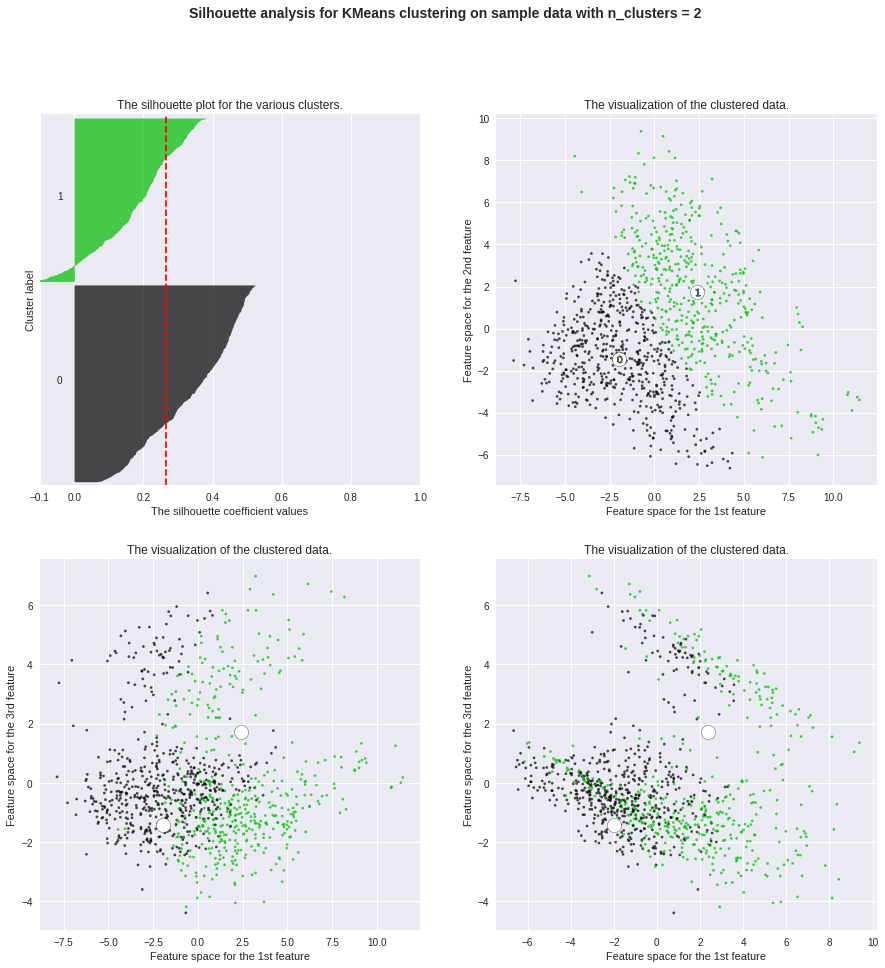

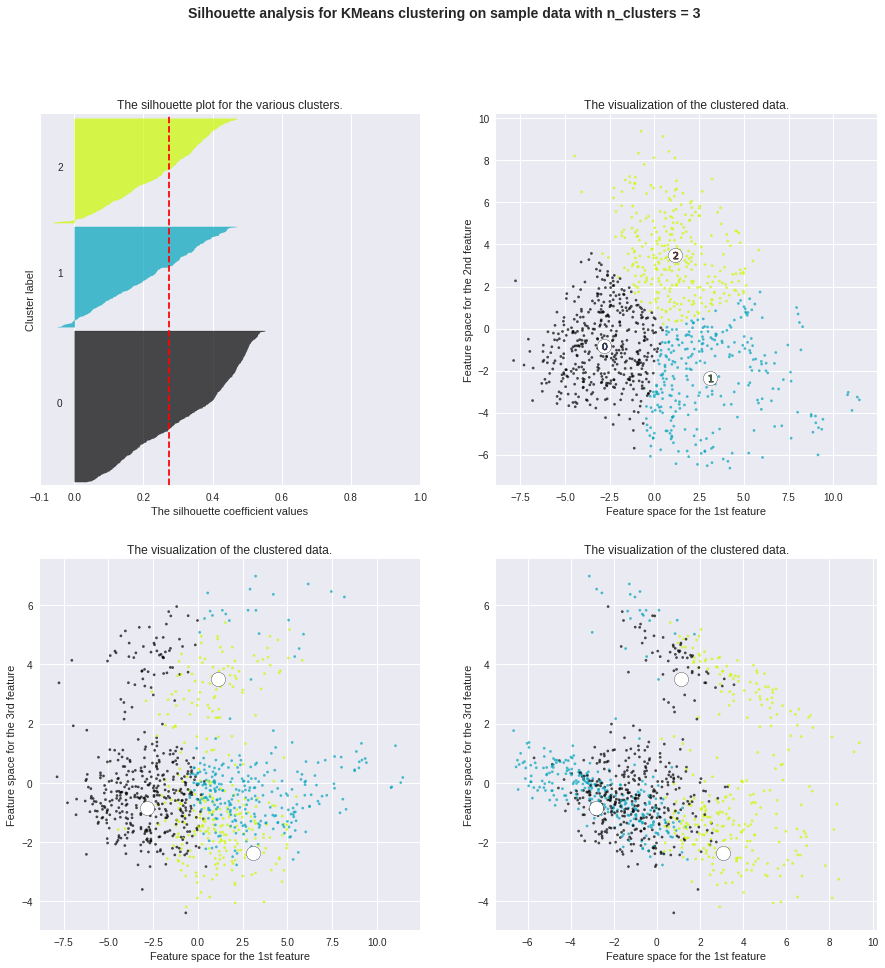

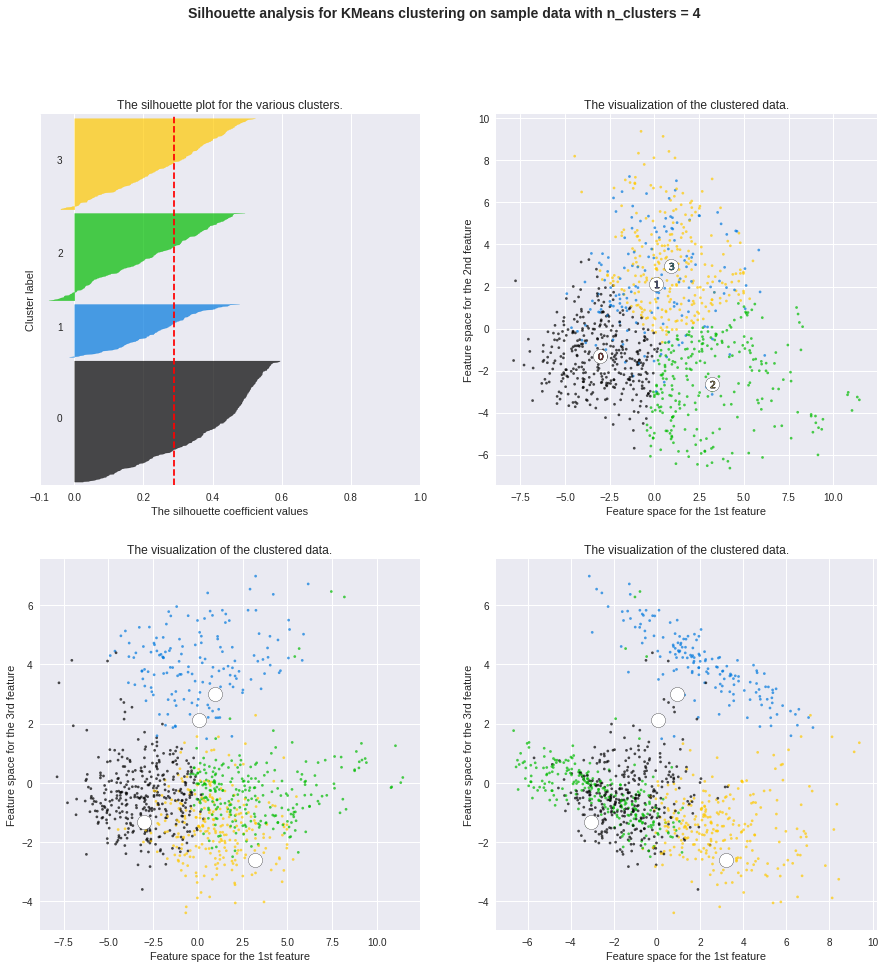

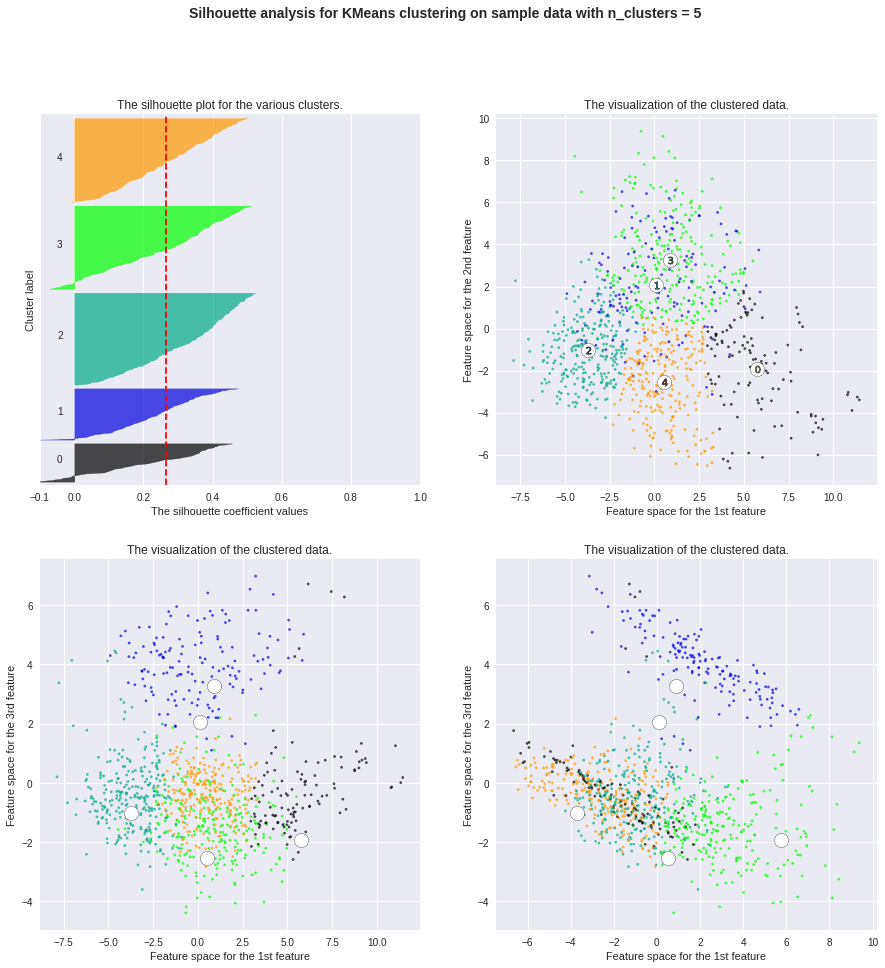

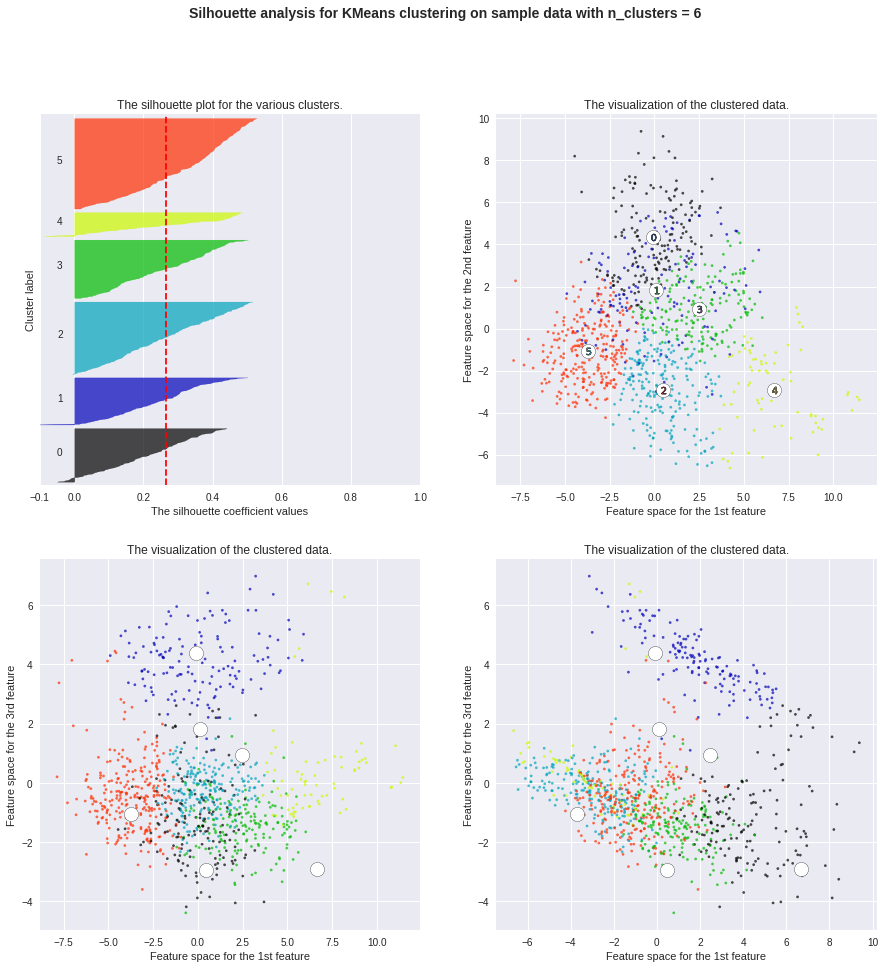

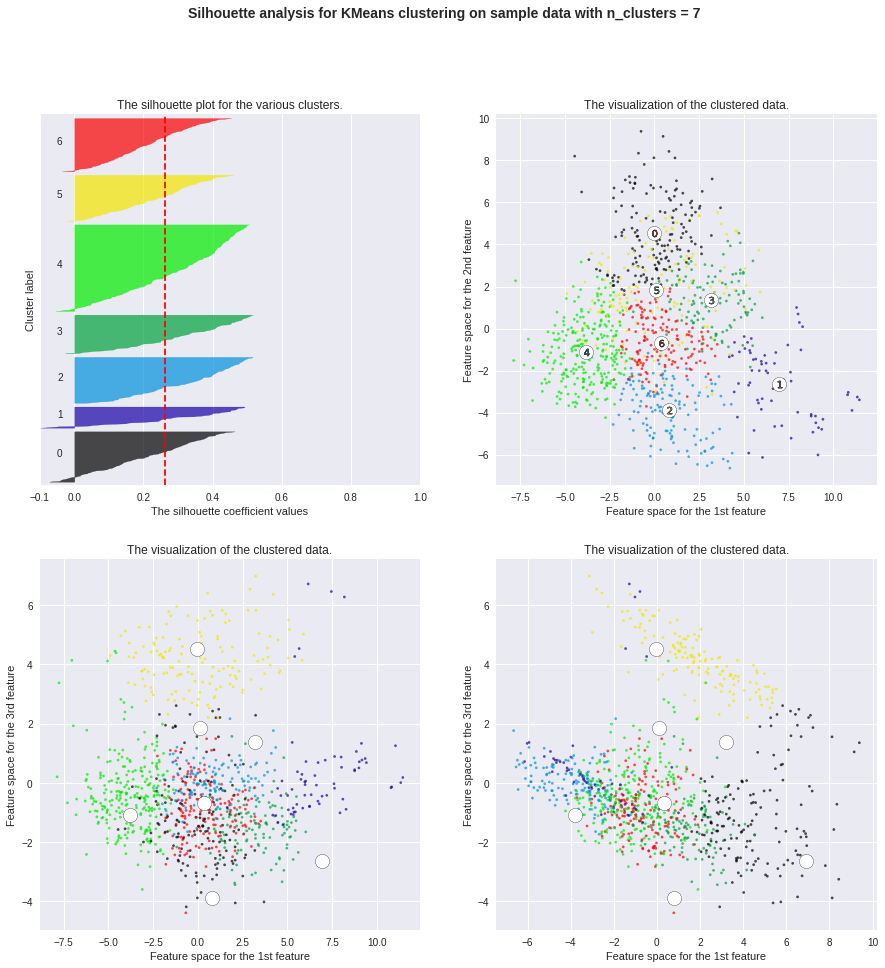

In [5]:
pca_4 = PCA(n_components=4)
X = pca_4.fit_transform(commute_normed)
cluster_range(X, range(2,8))

In [6]:
pca_df = pd.DataFrame(X, 
                      columns=['PComponent_1', 
                                  'PComponent_2', 
                                  'PComponent_3', 
                                  'PComponent_4'],
                      index=commute_dummies.index)
pca_df.shape

(1025, 4)

In [7]:
# fig = plt.figure(figsize=(20,6))

# x = np.arange(1,6)
# cumulative_explained_variance = np.cumsum(X.explained_variance_ratio_)

# plt.plot(x, cumulative_explained_variance,'-o')
# plt.bar(x, X.explained_variance_ratio_, align='center', alpha=0.5)

# for i,j in zip(x, np.cumsum(X.explained_variance_ratio_)):
#     plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

# plt.xlabel('PCA components', fontsize=14)
# plt.ylabel('Explained Variance', fontsize=14)
# plt.title('Scaled PCA on 5 Features - Commute Dataset')
# plt.show()
# # plt.savefig('./figures/Scaled PCA on 5 Features - Commute Dataset.pdf')

In [8]:
# X_pca_df = pd.DataFrame(commute_pca)

## 2. Augment Commute Dataset
* Reassign numeric values to normalized numeric values
* Include PCA data

In [9]:
for col in commute_normed.columns:
    commute_dummies[col] = commute_normed[col]

In [10]:
commute_dummies.shape

(1025, 1434)

In [11]:
commute_normed_pca_df = pd.concat([commute_dummies, pca_df], axis=1)
commute_normed_pca_df.shape

(1025, 1438)

## 3. Pickling

In [13]:
commute_normed_pca_df.to_pickle('./data/commute_normed_pca_df.pkl')